# Homework:
Any mass can lead to a gravitational potential in 3-D (x-y-z) space$$
\nabla^2\Phi=4\pi G\rho
$$

We will set G=1 for this problem.
Please solve the potential of a line mass (i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using SOR. Since the problem has symmetry in the Z direction:$$
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
$$

The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$ at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2G$\mu$*ln(r)+constant. Where $\mu$ is its mass per unit length and r is the distance to the line mass.

Initializing
0
3.141592653589793
1.413716694115407
1.2723450247038663
0.8588328916751098
0.7729496025075988
0.579712201880699
0.5217409816926292
0.4108710230829455
0.36978392077465094
0.2995249758274673
10
0.2695724782447206
0.22239729455189447
0.20015756509670501
0.1672745365451035
0.15054708289059315
0.12702410118893798
0.11432169107004418
0.09717343740953756
0.0874560936685838
0.07477496008663914
20
0.06729746407797522
0.05781463959426054
0.052033175634834485
0.044878613985044745
0.04039075258654027
0.03495353589219831
0.03145818230297848
0.027301208212942036
0.024571087391647834
0.021376846030733615
30
0.020068592452584078
0.019258681179501025
0.01865694154520381
0.017964943823147284
0.017444404750322162
0.01684387695428491
0.01638841087205667
0.015870160542547307
0.01545839784465275
0.015005738080432707
40
0.01463174866237349
0.014233814952342438
0.013891277259362678
0.01353825317000501
0.01322362241687225
0.012907131305265995
0.01261819059492586
0.012332067938648716
0.01206644032

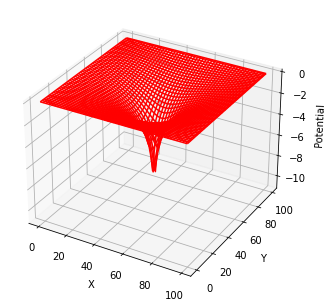

In [7]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   

rho = zeros((Nmax, Nmax), float)
rho[49,49] = 1

    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1/4*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]-pi*rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j]=V[i,j]+omega*du
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

By performing a fitting we see that there is excelent agreement between our two answers.
The fitting was done to avoid 0 due to the singularity as 0

[ 1.97122822 -7.74018539]


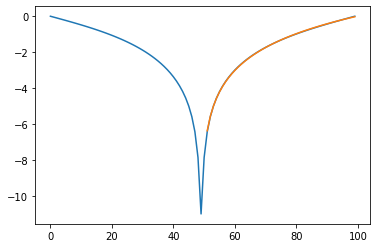

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x = []
y = []
for i in range(100):
    x.append(i)
    y.append(V[i,49])
    
    
plt.plot(x,y)


posx = range(51,100)
posy = y[51:]


def fit(x, u, c):
    x = np.array(x)
    return u*np.log(x-49)+c

pars, cons = curve_fit(fit, posx, posy)
# fitted u and c
print(pars)
plt.plot(posx,fit(posx, *pars))

plt.show()